In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
df.shape

(1436, 38)

In [4]:
df1=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
# Z-Score using pandas
df2=df1
df2['Price'] = (df2['Price'] - df2['Price'].min())/ (df2['Price'].max()-df2['Price'].min())
df2['Age_08_04'] = (df2['Age_08_04'] - df2['Age_08_04'].min())/ (df2['Age_08_04'].max()-df2['Age_08_04'].min())
df2['KM'] = (df2['KM'] - df2['KM'].min())/ (df2['KM'].max()-df2['KM'].min())
df2['HP'] = (df2['HP'] - df2['HP'].min())/ (df2['HP'].max()-df2['HP'].min())
df2['cc'] = (df2['cc'] - df2['cc'].min())/ (df2['cc'].max()-df2['cc'].min())
df2['Weight'] = (df2['Weight'] - df2['Weight'].min())/ (df2['Weight'].max()-df2['Weight'].min())
df2['Quarterly_Tax'] = (df2['Quarterly_Tax'] - df2['Quarterly_Tax'].min())/ (df2['Quarterly_Tax'].max()-df2['Quarterly_Tax'].min())
df2


C:\Users\Admin\AppData\Local\Temp\ipykernel_14120\3484272553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Price'] = (df2['Price'] - df2['Price'].min())/ (df2['Price'].max()-df2['Price'].min())
C:\Users\Admin\AppData\Local\Temp\ipykernel_14120\3484272553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age_08_04'] = (df2['Age_08_04'] - df2['Age_08_04'].min())/ (df2['Age_08_04'].max()-df2['Age_08_04'].min())
C:\Users\Admin\AppData\Local\Temp\ipykernel_14120\3484272553.py:5: SettingWithCopy

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.325044,0.278481,0.193355,0.170732,0.047619,3,5,0.723485,0.268293
1,0.333925,0.278481,0.300149,0.170732,0.047619,3,5,0.723485,0.268293
2,0.341030,0.291139,0.171647,0.170732,0.047619,3,5,0.723485,0.268293
3,0.376554,0.316456,0.197528,0.170732,0.047619,3,5,0.723485,0.268293
4,0.333925,0.367089,0.158433,0.170732,0.047619,3,5,0.723485,0.276423
...,...,...,...,...,...,...,...,...,...
1431,0.111901,0.860759,0.084539,0.138211,0.000000,3,5,0.189394,0.040650
1432,0.230728,0.898734,0.078186,0.138211,0.000000,3,5,0.189394,0.024390
1433,0.147425,0.886076,0.070021,0.138211,0.000000,3,5,0.189394,0.024390
1434,0.103020,0.873418,0.069609,0.138211,0.000000,3,5,0.189394,0.024390


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          1436 non-null   float64
 1   Age_08_04      1436 non-null   float64
 2   KM             1436 non-null   float64
 3   HP             1436 non-null   float64
 4   cc             1436 non-null   float64
 5   Doors          1436 non-null   int64  
 6   Gears          1436 non-null   int64  
 7   Quarterly_Tax  1436 non-null   float64
 8   Weight         1436 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 101.1 KB


In [7]:
df2.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [8]:
df2.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<AxesSubplot:>

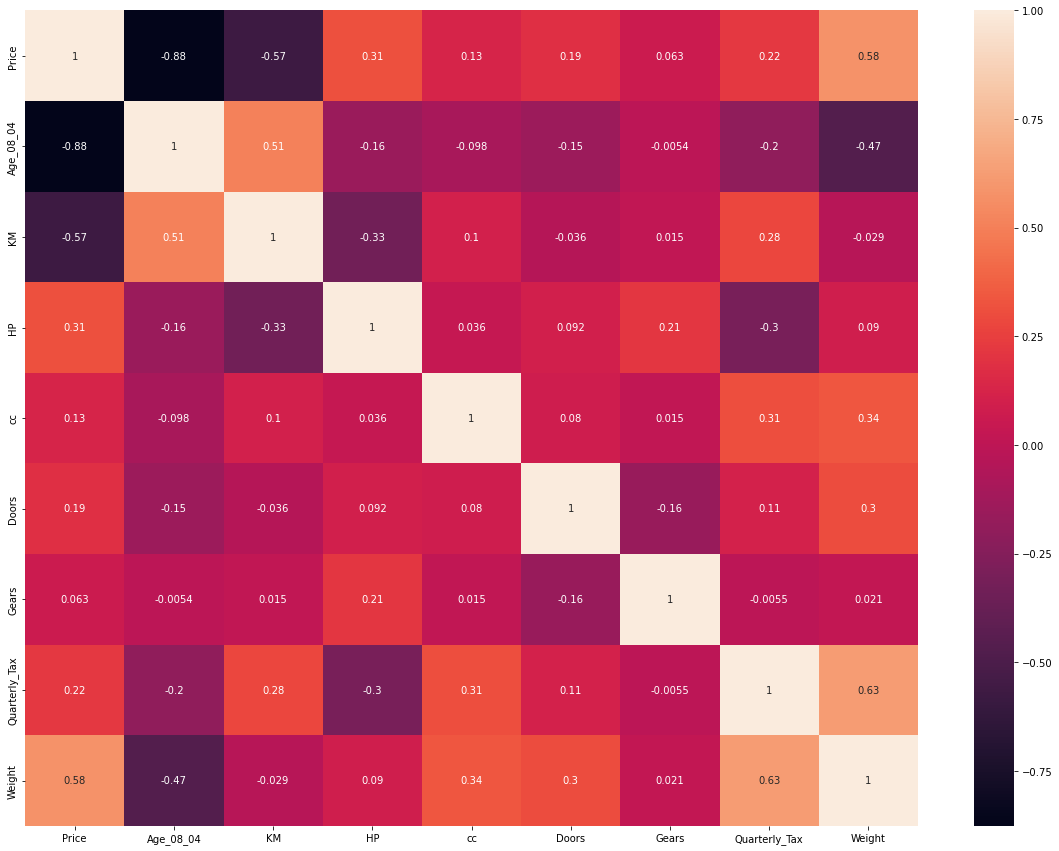

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(df2.corr(),annot=True)

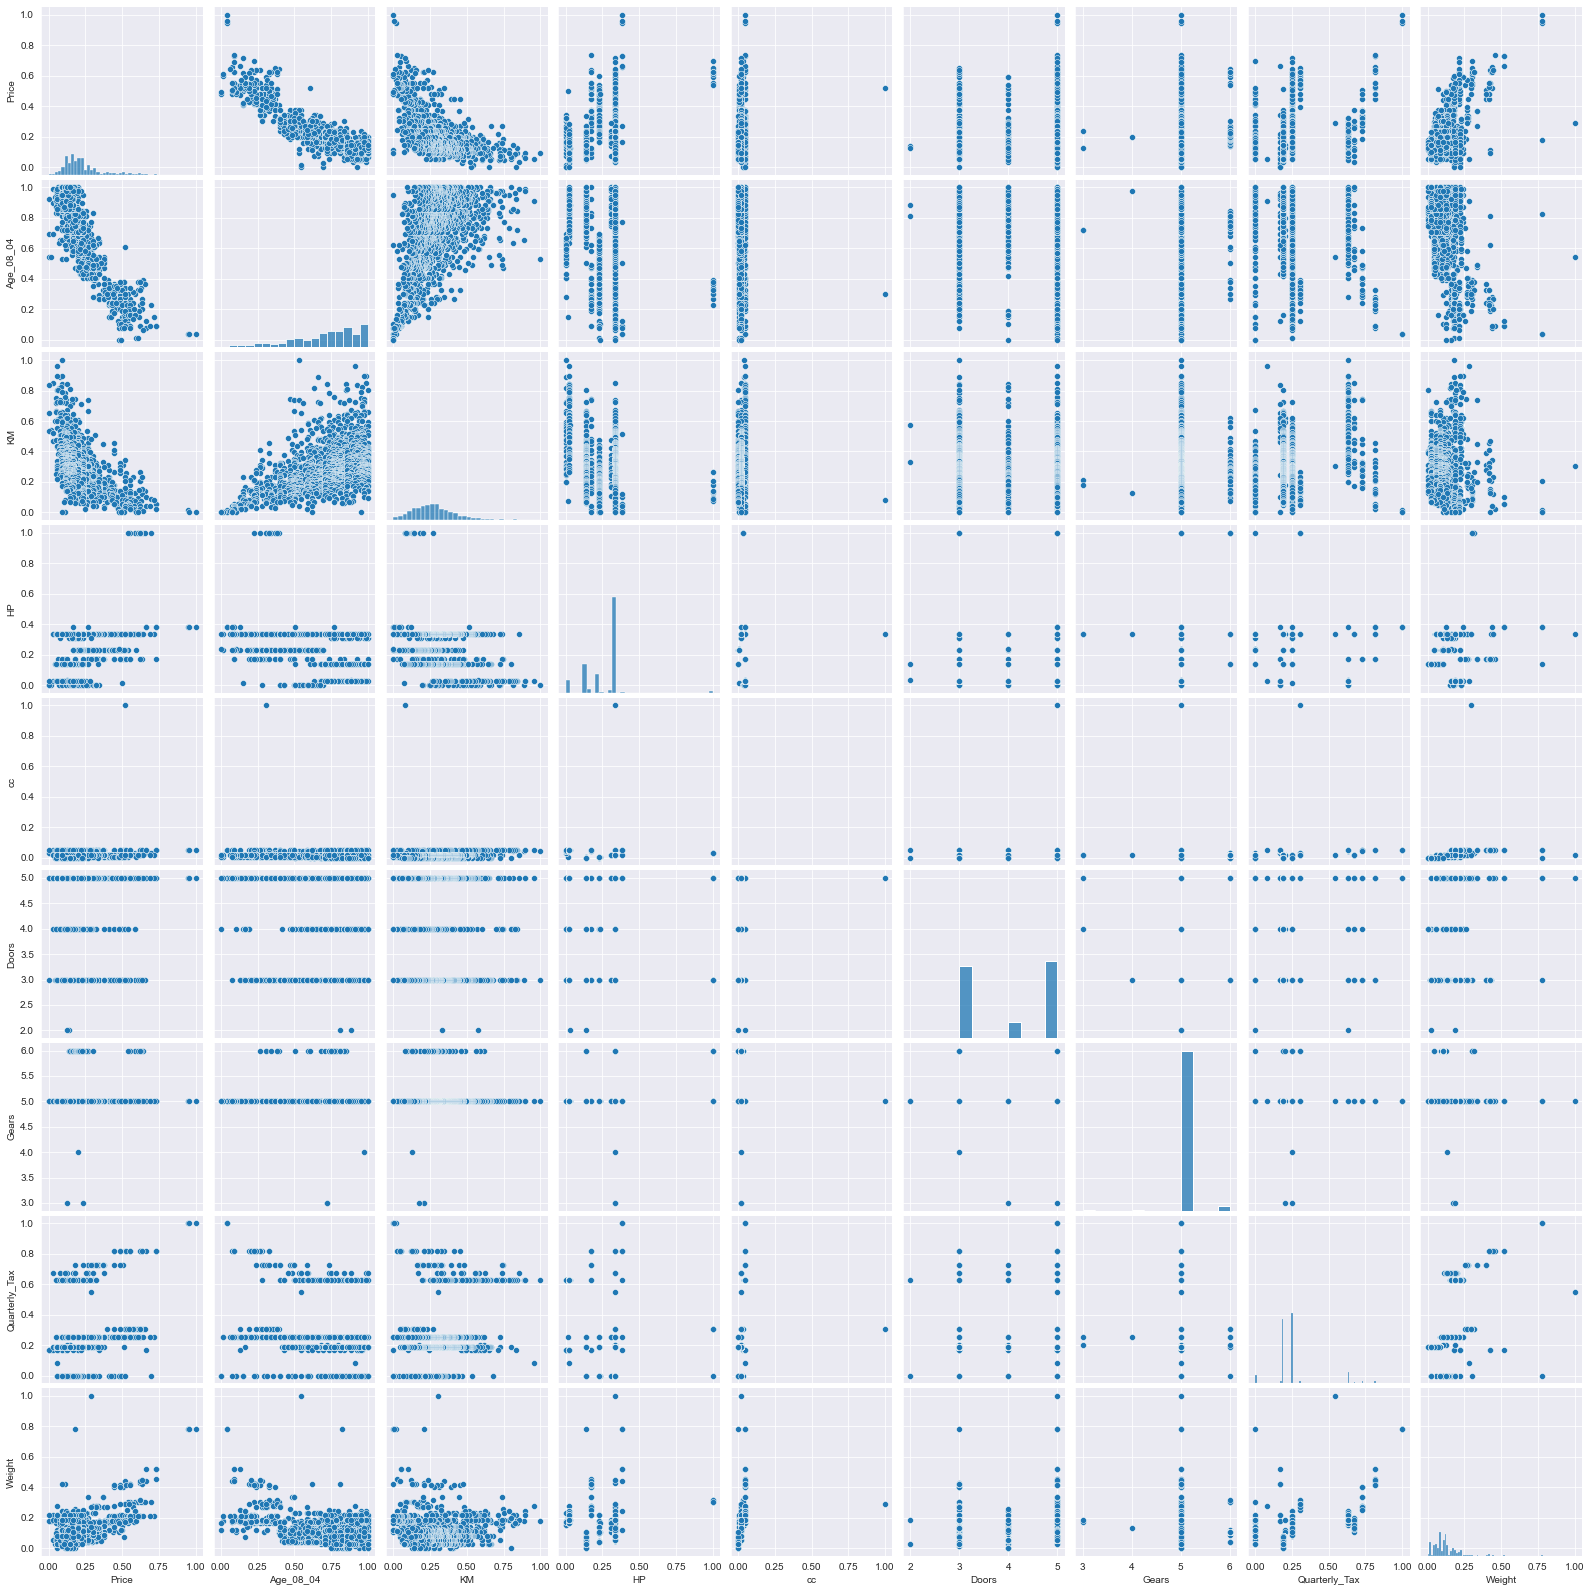

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(df2)

In [11]:
df3=df2.rename({'Age_08_04':'Age','Quarterly_Tax':'tax'},axis=1)
df3

,Price,Age,KM,HP,cc,Doors,Gears,tax,Weight
0,0.325044,0.278481,0.193355,0.170732,0.047619,3,5,0.723485,0.268293
1,0.333925,0.278481,0.300149,0.170732,0.047619,3,5,0.723485,0.268293
2,0.341030,0.291139,0.171647,0.170732,0.047619,3,5,0.723485,0.268293
3,0.376554,0.316456,0.197528,0.170732,0.047619,3,5,0.723485,0.268293
4,0.333925,0.367089,0.158433,0.170732,0.047619,3,5,0.723485,0.276423
...,...,...,...,...,...,...,...,...,...
1431,0.111901,0.860759,0.084539,0.138211,0.000000,3,5,0.189394,0.040650
1432,0.230728,0.898734,0.078186,0.138211,0.000000,3,5,0.189394,0.024390
1433,0.147425,0.886076,0.070021,0.138211,0.000000,3,5,0.189394,0.024390
1434,0.103020,0.873418,0.069609,0.138211,0.000000,3,5,0.189394,0.024390


In [12]:
model = smf.ols("Price~Age+KM+HP+cc+tax+Weight+Gears+Doors",data=df3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:57:34   Log-Likelihood:                 2336.7
No. Observations:                1436   AIC:                            -4655.
Df Residuals:                    1427   BIC:                            -4608.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3203      0.036      8.844      0.000       0.249       0.391
Age           -0.3414      0.007    -46.512      0.000      -0.356      -0.327
KM            -0.1797      0.011    -16.622      0.000      -0.201      -0.158
HP             0.1384      0.012     11.241      0.000       0.114       0.163
cc            -0.0632      0.047     -1.344      0.179      -0.156       0.029
tax            0.0370      0.012      3.015      0.003       0.013       0.061
Weight         0.3705      0.023     15.880      0.000       0.325       0.416
Gears          0.0211      0.007      3.016      0.003       0.007       0.035
Doors      -5.743e-05      0.001     -0.040      0.968      -0.003       0.003
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                         248.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Calculating VIF

In [13]:
rsq_Age = smf.ols('Age~KM+HP+cc+tax+Weight+Gears+Doors',data=df3).fit().rsquared  
vif_Age= 1/(1-rsq_Age)
rsq_KM = smf.ols('KM~Age+HP+cc+tax+Weight+Gears+Doors',data=df3).fit().rsquared  
vif_KM= 1/(1-rsq_KM)
rsq_HP = smf.ols('HP~KM+Age+cc+tax+Weight+Gears+Doors',data=df3).fit().rsquared  
vif_HP= 1/(1-rsq_HP)
rsq_cc = smf.ols('cc~KM+HP+Age+tax+Weight+Gears+Doors',data=df3).fit().rsquared  
vif_cc= 1/(1-rsq_cc)
rsq_tax = smf.ols('tax~KM+HP+cc+Age+Weight+Gears+Doors',data=df3).fit().rsquared  
vif_tax= 1/(1-rsq_tax)
rsq_Gears = smf.ols('Age~KM+HP+cc+tax+Weight+Age+Doors',data=df3).fit().rsquared  
vif_Gears= 1/(1-rsq_Gears)
rsq_Weight= smf.ols('Weight~KM+HP+cc+tax+Age+Gears+Doors',data=df3).fit().rsquared  
vif_Weight= 1/(1-rsq_Weight)
rsq_Doors = smf.ols('Doors~KM+HP+cc+tax+Weight+Gears+Age',data=df3).fit().rsquared  
vif_Doors= 1/(1-rsq_Doors)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14120\1161040907.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  vif_Gears= 1/(1-rsq_Gears)


In [14]:
# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','Hp','cc','tax','Weight','Gears','Doors'],'VIF':[vif_Age,vif_KM,vif_HP,vif_cc,vif_tax,vif_Weight,vif_Gears,vif_Doors]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame
#All the VIF values are less than 10 within the threshold.

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,Hp,1.419422
3,cc,1.163894
4,tax,2.311431
5,Weight,2.516420
6,Gears,inf
7,Doors,1.156575


# Residual Analysis

In [15]:
model.predict()

array([0.44272044, 0.42352949, 0.44229955, ..., 0.14580099, 0.15019674,
       0.21500669])

In [16]:
model.resid

0      -0.117676
1      -0.089604
2      -0.101269
3      -0.052451
4      -0.087830
          ...   
1431   -0.045959
1432    0.090716
1433    0.001624
1434   -0.047177
1435   -0.122644
Length: 1436, dtype: float64

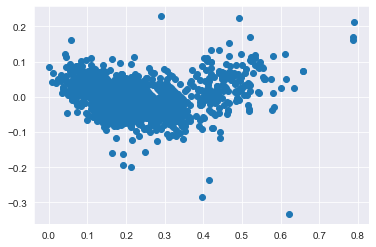

In [17]:
plt.scatter(model.predict(),model.resid)

# Test for Normality of Residual(Q-Q plot)

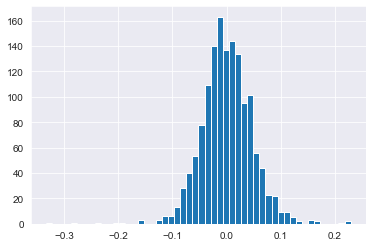

In [18]:
plt.hist(model.resid,bins=50)
plt.show()# The errors are approximately normally distributed with some outliers.

<Figure size 1440x576 with 0 Axes>

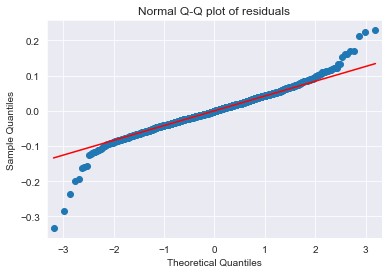

In [19]:
import statsmodels.api as sm
plt.figure(figsize=(20,8))
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

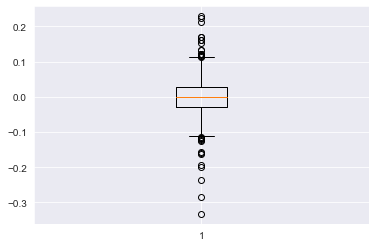

In [20]:
plt.boxplot(model.resid)
plt.show() #Outliers are detected.

In [21]:
# finding the 1st quartile
q1 = np.quantile(model.resid, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(model.resid, 0.75)
med = np.median(model.resid)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

0.05658769794577073 0.11328970248512964 -0.11306108929795329


In [22]:
outliers = model.resid[(model.resid <= lower_bound) | (model.resid>= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:0      -0.117676
16      0.119298
52      0.132904
74      0.133529
109     0.211264
110     0.160936
111     0.168856
115     0.122826
125     0.151527
141     0.116758
147     0.224411
154     0.121684
161     0.116150
171     0.169513
191    -0.193126
192    -0.198918
221    -0.332733
254    -0.113169
321    -0.119468
393    -0.159280
402    -0.163199
463    -0.124526
523     0.228917
557     0.113933
601    -0.285627
654    -0.155752
960    -0.236500
1058    0.161230
1079    0.121051
1382   -0.117203
1435   -0.122644
dtype: float64


In [23]:
outliers.index

Int64Index([   0,   16,   52,   74,  109,  110,  111,  115,  125,  141,  147,
             154,  161,  171,  191,  192,  221,  254,  321,  393,  402,  463,
             523,  557,  601,  654,  960, 1058, 1079, 1382, 1435],
           dtype='int64')

In [24]:
y=df3

In [25]:
df4= y.drop(y.index[[outliers.index]],axis=0).reset_index()
df4

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,index,Price,Age,KM,HP,cc,Doors,Gears,tax,Weight
0,1,0.333925,0.278481,0.300149,0.170732,0.047619,3,5,0.723485,0.268293
1,2,0.341030,0.291139,0.171647,0.170732,0.047619,3,5,0.723485,0.268293
2,3,0.376554,0.316456,0.197528,0.170732,0.047619,3,5,0.723485,0.268293
3,4,0.333925,0.367089,0.158433,0.170732,0.047619,3,5,0.723485,0.276423
4,5,0.305506,0.392405,0.251026,0.170732,0.047619,3,5,0.723485,0.276423
...,...,...,...,...,...,...,...,...,...,...
1400,1430,0.145648,1.000000,0.094646,0.138211,0.000000,3,5,0.189394,0.024390
1401,1431,0.111901,0.860759,0.084539,0.138211,0.000000,3,5,0.189394,0.040650
1402,1432,0.230728,0.898734,0.078186,0.138211,0.000000,3,5,0.189394,0.024390
1403,1433,0.147425,0.886076,0.070021,0.138211,0.000000,3,5,0.189394,0.024390


In [26]:
df5=df4.drop(['index'],axis=1)
df5

,Price,Age,KM,HP,cc,Doors,Gears,tax,Weight
0,0.333925,0.278481,0.300149,0.170732,0.047619,3,5,0.723485,0.268293
1,0.341030,0.291139,0.171647,0.170732,0.047619,3,5,0.723485,0.268293
2,0.376554,0.316456,0.197528,0.170732,0.047619,3,5,0.723485,0.268293
3,0.333925,0.367089,0.158433,0.170732,0.047619,3,5,0.723485,0.276423
4,0.305506,0.392405,0.251026,0.170732,0.047619,3,5,0.723485,0.276423
...,...,...,...,...,...,...,...,...,...
1400,0.145648,1.000000,0.094646,0.138211,0.000000,3,5,0.189394,0.024390
1401,0.111901,0.860759,0.084539,0.138211,0.000000,3,5,0.189394,0.040650
1402,0.230728,0.898734,0.078186,0.138211,0.000000,3,5,0.189394,0.024390
1403,0.147425,0.886076,0.070021,0.138211,0.000000,3,5,0.189394,0.024390


# Cooks distance

In [40]:
model_influence =model.get_influence()
(c, _) = model_influence.cooks_distance

In [41]:
K=8 
N=1405
3*(K+1)/N

0.019217081850533807

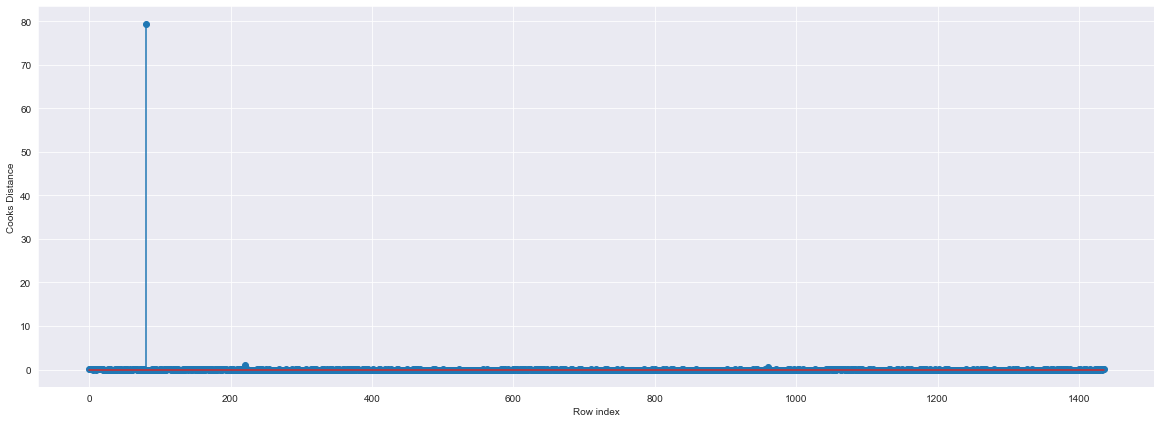

In [45]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(df3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [46]:
np.where(c>0.0192)

(array([  14,   16,   80,  109,  110,  111,  141,  191,  192,  221,  523,
         601,  654,  960,  991, 1058], dtype=int64),)

In [48]:
new_data=df.drop(df.index[[  14,   16,   80,  109,  110,  111,  141,  191,  192,  221,  523,
         601,  654,  960,  991, 1058]],axis=0).reset_index()
new_data.head(2)

,index,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,...,1,1,1,0,0,0,1,0,0,0
1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,...,1,0,1,0,0,0,1,0,0,0


In [50]:
final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=new_data).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1401.
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:16:27   Log-Likelihood:                -12025.
No. Observations:                1420   AIC:                         2.407e+04
Df Residuals:                    1411   BIC:                         2.412e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.478e+04   1481.164     -9.977      0.000   -1.77e+04   -1.19e+04
Age_08_04      -111.4335      2.401    -46.417      0.000    -116.143    -106.724
KM               -0.0173      0.001    -15.238      0.000      -0.020      -0.015
HP               29.8391      2.740     10.891      0.000      24.465      35.214
cc               -3.3917      0.299    -11.359      0.000      -3.977      -2.806
Doors          -131.4964     36.226     -3.630      0.000    -202.559     -60.434
Gears           347.2289    179.771      1.932      0.054      -5.419     699.876
Quarterly_Tax     2.2180      1.358      1.633      0.103      -0.447       4.883
Weight           31.5487      1.396     22.606      0.000      28.811      34.286
==============================================================================
Omnibus:                       46.463   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.960
Skew:                           0.210   Prob(JB):                     1.07e-20
Kurtosis:                       4.174   Cond. No.                     3.78e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

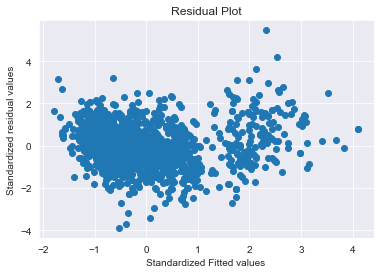

In [52]:
plt.scatter(get_standardized_values(final_model.fittedvalues),
            get_standardized_values(final_model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [53]:
final_model.predict()

array([16307.50534447, 15857.30872627, 16287.58230597, ...,
        8688.42841067,  8801.59667375, 10874.4892995 ])